In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('rankings.csv')

In [3]:
df

,option,simplicity,resource_requirement,features,nft_control,presentation_control
0,Opensea,7,4,2,5,1
1,NFTify,6,10,7,6,4
2,Rarible,8,10,2,4,1
3,Outsourcing,5,2,8,8,8
4,DIY,0,2,10,10,10
5,Crypto.com,1,7,2,3,1


In [4]:
lst = []

In [5]:
accessibility_pts = 20
functionality_pts = 30
for i in df.index:
    option = df.option[i]
    accessibility = (((df.simplicity[i] + df.resource_requirement[i]) / accessibility_pts) * 100)
    functionality = (((df.features[i] + df.nft_control[i] + df.presentation_control[i]) / functionality_pts) * 100)
    lst.append([option, accessibility, functionality])

In [6]:
lst

[['Opensea', 55.00000000000001, 26.666666666666668],
 ['NFTify', 80.0, 56.666666666666664],
 ['Rarible', 90.0, 23.333333333333332],
 ['Outsourcing', 35.0, 80.0],
 ['DIY', 10.0, 100.0],
 ['Crypto.com', 40.0, 20.0]]

In [7]:
perceptual_data = pd.DataFrame(lst, columns = ['Option', 'Accessibility', 'Functionality'])

In [8]:
perceptual_data

,Option,Accessibility,Functionality
0,Opensea,55.0,26.666667
1,NFTify,80.0,56.666667
2,Rarible,90.0,23.333333
3,Outsourcing,35.0,80.000000
4,DIY,10.0,100.000000
5,Crypto.com,40.0,20.000000


In [9]:
import plotly.express as px
import plotly.graph_objects as go

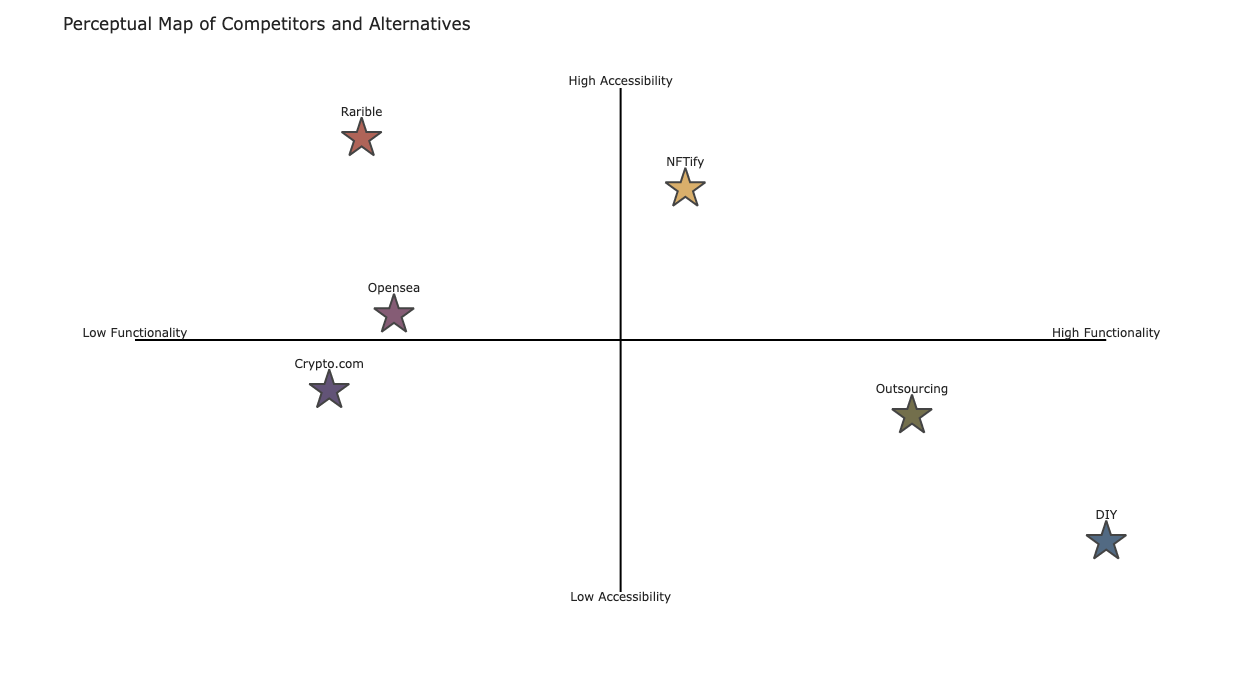

In [33]:
fig=px.scatter(perceptual_data, x="Functionality", y="Accessibility", color="Option", text="Option", 
               labels={
                   "Accessibility" : "",
                   "Functionality" : "" 
               }, color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textposition='top center', marker={'size':30,'line':{'width':2}}, marker_symbol='star')

fig.update_layout(
    height=700,
    width=700,
    title_text='Perceptual Map of Competitors and Alternatives',
    template="simple_white",
    showlegend=False,
)

fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.add_trace(go.Scatter(x=[0,100], y=[50,50], mode="lines+text", 
                         line={'color':'black'},
                         text=["Low Functionality", "High Functionality"],
                         textposition="top center",
                         cliponaxis=False))
fig.add_trace(go.Scatter(x=[50,50], y=[0,100], mode="lines+text", 
                         line={'color':'black'},
                         text=["Low Accessibility", "High Accessibility"],
                         textposition=["bottom center", "top center"],
                         cliponaxis=False))
fig.add_trace(go.Scatter())
fig.show()

In [11]:
prefs=[["Businesses", 25, 90], ["Digital Artists & Creators", 75, 85], ["Influencers", 35, 60], ["Hobbyists", 70, 35]]

In [12]:
segment_preferences = pd.DataFrame(prefs, columns = ["Segment", "Accessibility", "Functionality"])

In [13]:
fig2=px.scatter(segment_preferences, x="Functionality", y="Accessibility", color="Segment", text="Segment",
                labels={
                   "Accessibility" : "",
                   "Functionality" : "" 
               })
fig2.update_traces(marker={'size':80,'line':{'width':2}, 'opacity':0.7}, textposition="top center")

fig2.update_layout(
    height=700,
    width=700,
    title_text='Preference Analysis of Market Segments',
    template="simple_white",
    showlegend=False
)

fig2.update_xaxes(visible=False)
fig2.update_yaxes(visible=False)
fig2.add_trace(go.Scatter(x=[0,100], y=[50,50], mode="lines+text", 
                         line={'color':'black'},
                         text=["Low Functionality", "High Functionality"],
                         textposition="top center",
                         cliponaxis=False,
                         showlegend=False))
_=fig2.add_trace(go.Scatter(x=[50,50], y=[0,100], mode="lines+text", 
                         line={'color':'black'},
                         text=["Low Accessibility", "High Accessibility"],
                         textposition=["bottom center", "top center"],
                         cliponaxis=False,
                         showlegend=False))

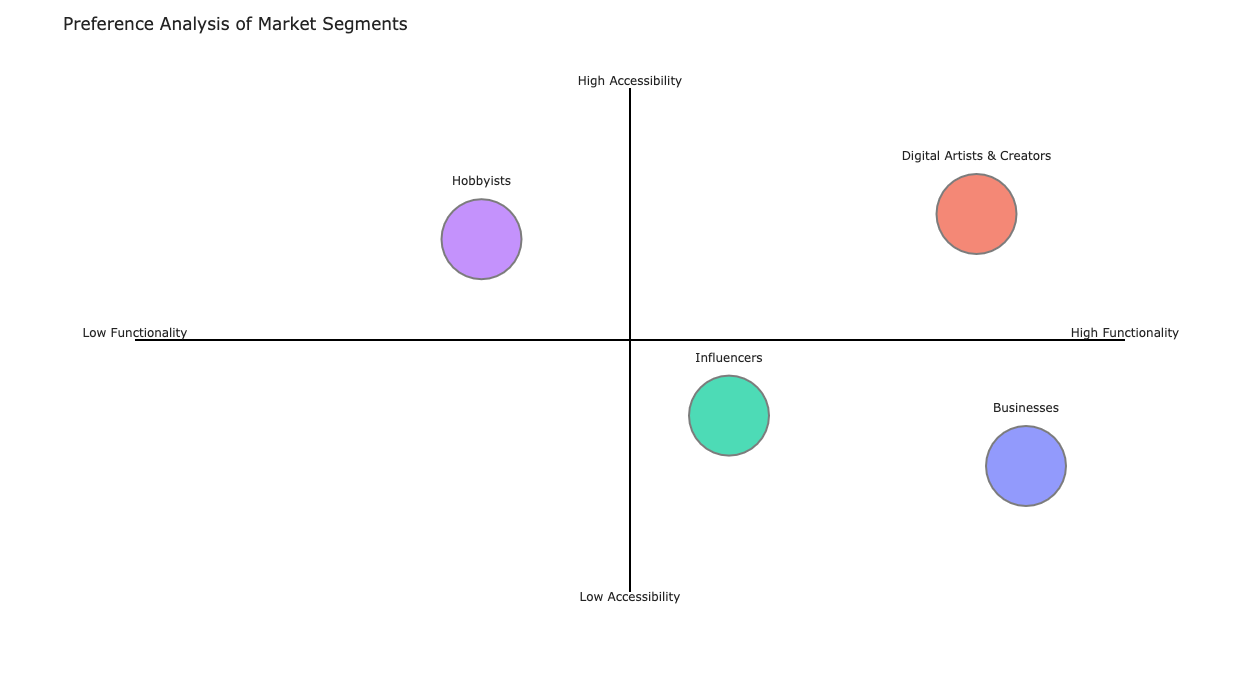

In [14]:
fig2

In [15]:
import os

In [16]:
if not os.path.exists("plots"):
    os.mkdir("plots")

In [34]:
fig.write_image("plots/percepmap.pdf")
fig2.write_image("plots/prefanal.pdf")